# Project Details

**Batch**                -  May 2019 Batch (Group 10 A)  
**Project Type**         -  Capstone project  
**Project Domain**       -  NLP  
**Project Name**         -  Automatic Ticket Assignment  
**Submission Date**      -  24-Apr-2020      
**Submitted By**         -  Group10A  
**Delivery Type**        -  Milestone 1

## The Real Problem
One of the key activities of any IT function is to “Keep the lights on” to ensure there is noimpact to the Business operations. IT leverages Incident Management process to achieve theabove Objective. An incident is something that is unplanned interruption  to  an  IT  service  orreduction  in  the quality of an IT service that affects the Users and theBusiness. The main goal of Incident Management process is to provide a quick fix / workarounds or solutions thatresolves the interruption and restores the service to its full capacity to ensure no businessimpact.In most of the organizations, incidents are created by various Business and IT Users, End Users/ Vendors if they have access to ticketing systems, and from the integrated monitoringsystems and tools. Assigning the incidents to the appropriate person or unit in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources. The assignment of incidents to appropriate IT 
groups is still a manual process in many of the IT organizations.Manual assignment of incidents is time consuming and requires human efforts. There may bemistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service.

# Business Domain Value
In the support process,incoming incidents are analyzed and assessed by organization’s support teams to fulfill the request. 
In many organizations, better allocation and effective usage of the valuable support resources will directly result 
in substantial cost savings.Currently the incidents are created by various stakeholders (Business Users, IT Users 
and Monitoring Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). This team will review the incidents for right ticket categorization, priorities and then carry out initial diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2 teams. Incase L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from Applications and Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams by either Monitoring tools or Callers / Requestors. L3 teams will carry out detailed diagnosis and resolve the incidents. Around ~56% 
of incidents are resolved by Functional / L3 teams. Incase if vendor support is needed, they will reach out for their support towards incident closure.L1 / L2 needs to spend time reviewing Standard Operating Procedures (SOPs) before assigning to Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before ticket assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to L3 teams.During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents getting assigned to wrong functional groups. Around ~25% of Incidents are wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service.Guided by powerful AI techniques that can classify incidents to right functional groups can help organizations to reduce the resolving time of the issue and can focus on more productive tasks.

# Project Description

In this capstone project, the goal is to build a classifier that can classify the tickets by analysing text.Details about the data and dataset files are given in below link,https://drive.google.com/file/d/1OZNJm81JXucV3HmZroMq6qCT2m7ez7IJ 

## Milestone 1: 
● Pre-Processing, Data Visualisation and EDA Overview  
● Exploring the given Data files  
● Understanding the structure of data  
● Missing points in data  
● Finding inconsistencies in the data  
● Visualizing different patterns   
● Visualizing different text features  
● Dealing with missing values  
● Text preprocessing   
● Creating word vocabulary from the corpus of report text data  
● Creating tokens as required   

## Milestone 2
● Model BuildingOverview  
● Building a model architecture which can classify.  
● Trying different model architectures by researching state of the art for similar tasks.  
● Train the model  
● To deal with large training time, save the weights so that you can use them when training the model for the second time without starting from scratch.  

## Milestone 3:  
● Test the Model, Fine-tuning and RepeatOverview.  
● Test the model and report as per evaluation metrics.  
● Try different models.  
● Try different evaluation metrics.   
● Set different hyper parameters, by trying different optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc..for these models to fine-tune them.  
● Report evaluation metrics for these models along with your observation on how changing different hyper parameters leads to change in the final evaluation metric.  
        


# TEAM approach for Milestone 1

### Data Cleaning :
Remove e-mail addresses  
Remove punctuation marks, special characters  
Remove digits, new line characters, spaces   
Etc..

### Data Preprocessing:
Data Cleanup  
Missing value treatments  
Tokenization   
Removal of stop words  
Lemmatization   
Preparing dictionary of the words  
Text vectorization (Bag of words , TF-IDF)  
Prepare corpus 

### Topic Modelling:
Build  model for topic modelling (LDA model)  
Parameter tuning for distinct clusters of topics   


### Milestone 1

# Step1 : Reading and exploring data

In [170]:
# Let us first start with the special packages we are likely
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_colwidth', 100000)

In [171]:
import os
os.chdir("C:\\work\\capstone")
os.getcwd() 

'C:\\work\\capstone'

In [173]:
# Import Dataset
df = pd.read_excel('data.xlsx')
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,spxjnwir pjlcoqds,GRP_0
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


### Initial analysis
Tabular Data, with 4 columns 
Short Description  -- Casually written problem statement of the ticket in short description (not following any format)  
Description        -- Casually written long description (Not following any format)  
Caller          -- Call Name or ID (Not much informative so can be dropped)  
Assignment group -- Group the ticket assigned to  

In [174]:
df= df.drop("Caller" , axis=1)
df.columns=["short_description","long_description","assigned_group"]
df.head()

,short_description,long_description,assigned_group
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,GRP_0
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,GRP_0


## get rid of null values

In [12]:
pd.concat([df.count(),df.isnull().sum()],axis=1)   # Column 0 not null count, 1 null count

,0,1
short_description,8492,8
long_description,8499,1
assigned_group,8500,0


In [13]:
df.dropna(inplace=True) ## Not many null ,so can safely drop the rows

In [14]:
pd.concat([df.count(),df.isnull().sum()],axis=1)   # Column 0 not null count, 1 null count

,0,1
short_description,8491,0
long_description,8491,0
assigned_group,8491,0


## EDA

In [27]:
display(df['assigned_group'].value_counts(normalize=True, sort=True)*100)

GRP_0     46.731834
GRP_8      7.784713
GRP_24     3.403604
GRP_12     3.026734
GRP_9      2.967848
            ...    
GRP_67     0.011777
GRP_35     0.011777
GRP_64     0.011777
GRP_70     0.011777
GRP_73     0.011777
Name: assigned_group, Length: 74, dtype: float64

In [179]:
display(df['short_description'].value_counts(normalize=True, sort=True)*100)

password reset                                        0.447480
windows password reset                                0.341498
account locked in ad                                  0.282619
windows account locked                                0.270843
erp SID_34 account unlock                             0.223740
                                                        ...   
please delete the attached series of meetings         0.011776
problem in outlook client database synchronizing      0.011776
grir issues plant_322 for ice alt. routes from usa    0.011776
lean tracker - not able to add  new event             0.011776
unable to change quotation.                           0.011776
Name: short_description, Length: 7481, dtype: float64

## None of the short descrption is repeatable in nature, column cannot be used a single feature

In [183]:
display(df['long_description'].value_counts(normalize=True, sort=True)*100)   ## same is the case with Long description

the                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [23]:
print(df['assigned_group'].value_counts(normalize=False, sort=True))

GRP_0     3968
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_67       1
GRP_35       1
GRP_64       1
GRP_70       1
GRP_73       1
Name: assigned_group, Length: 74, dtype: int64


[Text(0, 0.5, 'Percent')]

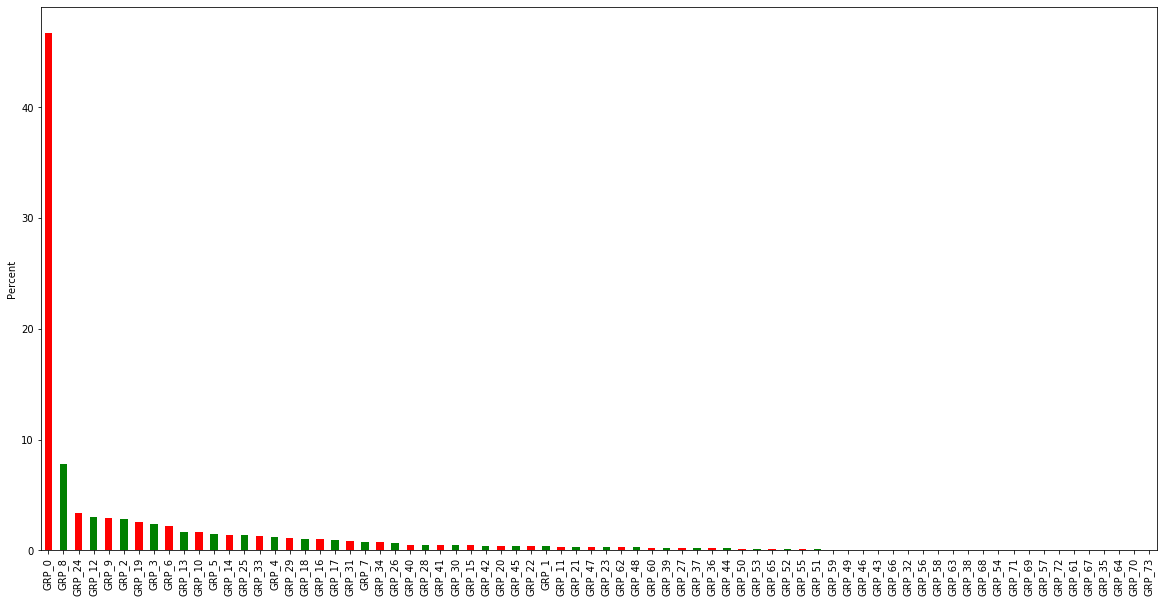

In [18]:
ax = (df['assigned_group'].value_counts(normalize=True, sort=True)*100).plot(kind = 'bar',figsize=(20,10),color=list('rg'))
ax.set(ylabel="Percent")
#plt.show()

## Its a classification problem but group assignements are highly imbalance, Group_0 got a lion share of 47% and rest are highly undersample

# None of the machine learning algorithem can be applied directly to create any model , best way to go forward would be use NLP model

## Data processing

In [31]:
import re
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'received'])
# spacy for lemmatization
import spacy

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [32]:
df["combined_description"]=df["short_description"]+" "+df["long_description"]
df.head()

,short_description,long_description,assigned_group,combined_description
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,GRP_0,login issue -verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",GRP_0,"outlook \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind"
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page unable to access hr_tool page
4,skype error,skype error,GRP_0,skype error skype error


In [33]:
df.shape

(8491, 4)

## First step to convert Short_description in bag of worlds which will make it use ful for NLP analysis

In [36]:
df['length'] = df['short_description'].apply(lambda x: len(x.split(" ")))
print("Maximum Length among the lines : " ,max(df['length']))
# Let us see if we could do it correctly .Looks good
df=df[["short_description","long_description","combined_description","assigned_group"]]
df

Maximum Length among the lines :  41


,short_description,long_description,combined_description,assigned_group
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,login issue -verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,GRP_0
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind","outlook \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,cant log in to vpn \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,unable to access hr_tool page unable to access hr_tool page,GRP_0
4,skype error,skype error,skype error skype error,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,"\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail.com\r\n\r\ngood afternoon,\r\ni am not receiving the emails that i sent from zz mail.\r\nplease advise\r\n\r\n","emails not coming in from zz mail \r\n\r\nreceived from: avglmrts.vhqmtiua@gmail.com\r\n\r\ngood afternoon,\r\ni am not receiving the emails that i sent from zz mail.\r\nplease advise\r\n\r\n",GRP_29
8496,telephony_software issue,telephony_software issue,telephony_software issue telephony_software issue,GRP_0
8497,vip2: windows password reset for tifpdchb pedxruyf,vip2: windows password reset for tifpdchb pedxruyf,vip2: windows password reset for tifpdchb pedxruyf vip2: windows password reset for tifpdchb pedxruyf,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to finish the drawers adjustment settings.\r\nis no network..,machine nÃ£o estÃ¡ funcionando i am unable to access the machine utilities to finish the drawers adjustment settings.\r\nis no network..,GRP_62


In [37]:
# # Remove Emails
df.combined_description = df.combined_description.str.replace('\S*@\S*\s?', '')
df.short_description = df.short_description.str.replace('\S*@\S*\s?', '')

# Remove new line characters
df.combined_description= df.combined_description.str.replace('\s+', ' ')
df.short_description = df.short_description.str.replace('\s+', ' ')

# Remove distracting single quotes
df.combined_description = df.combined_description.str.replace("\'", "")
df.short_description = df.short_description.str.replace("\'", "")

# Remove all non word characters
df.combined_description = df.combined_description.str.replace('\W', ' ')
df.short_description = df.short_description.str.replace('\W', ' ')

# Remove punctuation marks
df.short_description = df.short_description.str.replace('[,\.!?]', ' ')
df.combined_description = df.combined_description.str.replace('[,\.!?]', ' ')

df.combined_description = df.combined_description.str.lower()
df.short_description = df.short_description.str.lower()


In [38]:
df[["short_description","combined_description"]]

,short_description,combined_description
0,login issue,login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved
1,outlook,outlook received from hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind
2,cant log in to vpn,cant log in to vpn received from hi i cannot log on to vpn best
3,unable to access hr_tool page,unable to access hr_tool page unable to access hr_tool page
4,skype error,skype error skype error
...,...,...
8495,emails not coming in from zz mail,emails not coming in from zz mail received from good afternoon i am not receiving the emails that i sent from zz mail please advise
8496,telephony_software issue,telephony_software issue telephony_software issue
8497,vip2 windows password reset for tifpdchb pedxruyf,vip2 windows password reset for tifpdchb pedxruyf vip2 windows password reset for tifpdchb pedxruyf
8498,machine nã o estã funcionando,machine nã o estã funcionando i am unable to access the machine utilities to finish the drawers adjustment settings is no network


## simple_preprocess tokenizes the sentence .

In [40]:
# simple_preprocess tokenizes the sentence .
documents = df.short_description.values.tolist()
# When we set the flag deacc=True , the function removes punctuations also 
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

document_words = list(sent_to_words(documents))

print(document_words[:3])

[['login', 'issue'], ['outlook'], ['cant', 'log', 'in', 'to', 'vpn']]


In [41]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [42]:
# Remove Stop Words
document_words_1 = remove_stopwords(document_words)
print(document_words_1[:3])
print(document_words[:3])

[['login', 'issue'], ['outlook'], ['cant', 'log', 'vpn']]
[['login', 'issue'], ['outlook'], ['cant', 'log', 'in', 'to', 'vpn']]


## lemmatization

In [43]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# Init Lemmatizer
lemmatizer = WordNetLemmatizer()

hl_lemmatized = []
for tokens in document_words_1:
    lemm = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in tokens]
    hl_lemmatized.append(lemm)
    
print('Lemmatization Completed ')

Lemmatization Completed 


In [45]:
print(document_words_1[:10])
print(hl_lemmatized[:10])

[['login', 'issue'], ['outlook'], ['cant', 'log', 'vpn'], ['unable', 'access', 'hr_tool', 'page'], ['skype', 'error'], ['unable', 'log', 'engineering', 'tool', 'skype'], ['event', 'critical', 'hostname_', 'company', 'com', 'value', 'mountpoint', 'threshold', 'oracle', 'sid_', 'erpdata'], ['ticket_no', 'employment', 'status', 'new', 'non', 'employee', 'enter', 'users', 'name'], ['unable', 'disable', 'add', 'ins', 'outlook'], ['ticket', 'update', 'inplant_']]
[['login', 'issue'], ['outlook'], ['cant', 'log', 'vpn'], ['unable', 'access', 'hr_tool', 'page'], ['skype', 'error'], ['unable', 'log', 'engineering', 'tool', 'skype'], ['event', 'critical', 'hostname_', 'company', 'com', 'value', 'mountpoint', 'threshold', 'oracle', 'sid_', 'erpdata'], ['ticket_no', 'employment', 'status', 'new', 'non', 'employee', 'enter', 'user', 'name'], ['unable', 'disable', 'add', 'in', 'outlook'], ['ticket', 'update', 'inplant_']]


In [46]:
# Documents are ready to be processes further
processed_docs = hl_lemmatized

In [50]:
# Creating a dictionary of words 
dictionary = gensim.corpora.Dictionary(processed_docs)

count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break
print(len(dictionary))
vocab_size = len(dictionary)  + 1
print(vocab_size)
print(len(processed_docs))

0 issue
1 login
2 outlook
3 cant
4 log
5 vpn
6 access
7 hr_tool
8 page
9 unable
10 error
5333
5334
8491


In [78]:
# Let us create the corpus  (Bag of words which gives the word an the frequency of occurence for each document)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
# TF-IDF
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]


In [80]:
len(corpus_tfidf),len(bow_corpus)

(8491, 8491)

## Since there are multiple hetrogeneous groups, lets see if there is any pattens hidden in short description by which topics can be created

In [186]:
## Creating LDAP model with 4..10 topics and then see how they look visually
## with Bag of words
lda_model_bow = gensim.models.ldamodel.LdaModel(corpus=bow_corpus,
                                           id2word=dictionary,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [187]:
## with TFIDF
lda_model_tfidf = gensim.models.ldamodel.LdaModel(corpus=corpus_tfidf,
                                           id2word=dictionary,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


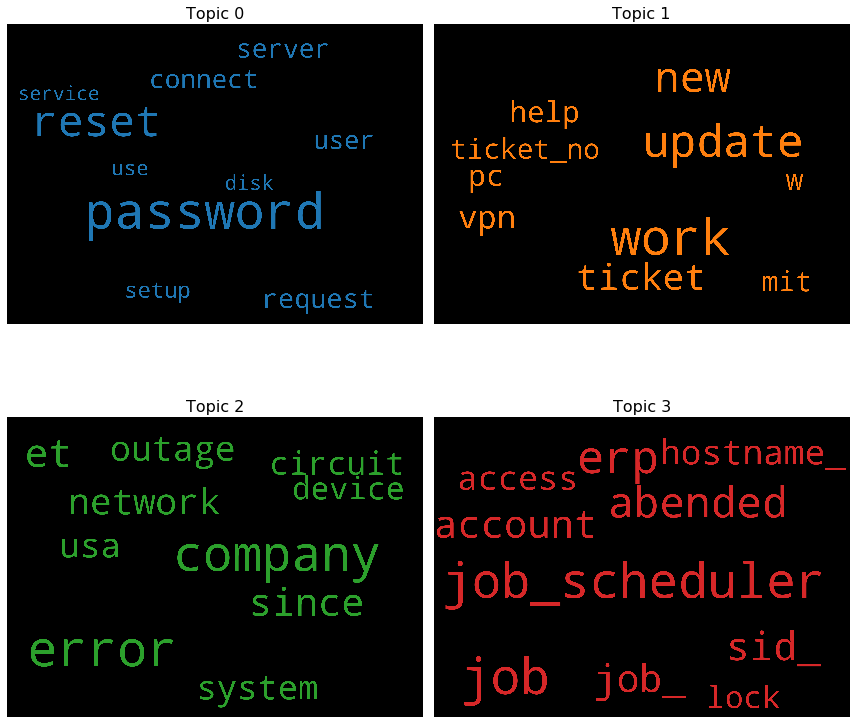

In [188]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='black',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(12,12), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [81]:
# pyLDAvis shows clear 4 topics without any overlapping , >4 topics are in overlapping state.

In [189]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_bow, bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.296876  0.128396       1        1  33.808132
3      0.031673 -0.319773       2        1  28.241730
1      0.008640  0.003446       3        1  20.489374
0      0.256562  0.187931       4        1  17.460764, topic_info=               Term        Freq       Total Category  logprob  loglift
87              job  786.000000  786.000000  Default  30.0000  30.0000
100   job_scheduler  760.000000  760.000000  Default  29.0000  29.0000
50         password  903.000000  903.000000  Default  28.0000  28.0000
4018        abended  573.000000  573.000000  Default  27.0000  27.0000
61              erp  735.000000  735.000000  Default  26.0000  26.0000
...             ...         ...         ...      ...      ...      ...
115          plant_   36.308846   37.037369   Topic4  -5.2771   1.7253
983    bk_hana_sid_   33.154354   33.834641   Topic4  -5.3680   1.7249
108         meeting   34.456303   35.187309   Topic4  -5.3294   1.7242
170           space   27.393555   28.074373   Topic4  -5.5588   1.7207
2287          lhqsm   39.918095   40.929924   Topic4  -5.1823   1.7202

[154 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
4018      4  0.999009  abended
295       3  0.992700     able
6         2  0.999365   access
60        2  0.999295  account
241       4  0.978434       ad
...     ...       ...      ...
1207      3  0.988178        w
1655      4  0.978830     warn
102       2  0.998970   window
69        3  0.996526     work
758       3  0.984663       æ³

[125 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

In [190]:
# with tfidf
vis = pyLDAvis.gensim.prepare(lda_model_tfidf, corpus_tfidf, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.225006  0.072949       1        1  37.078400
3      0.161247  0.157543       2        1  26.694866
0      0.043210 -0.187679       3        1  19.820339
1      0.020549 -0.042814       4        1  16.406395, topic_info=               Term        Freq       Total Category  logprob  loglift
4018        abended  332.000000  332.000000  Default  30.0000  30.0000
87              job  245.000000  245.000000  Default  29.0000  29.0000
100   job_scheduler  244.000000  244.000000  Default  28.0000  28.0000
99             job_  196.000000  196.000000  Default  27.0000  27.0000
50         password  241.000000  241.000000  Default  26.0000  26.0000
...             ...         ...         ...      ...      ...      ...
322     information   11.874732   12.496784   Topic4  -5.4615   1.7564
434       netweaver   11.486584   12.105533   Topic4  -5.4947   1.7550
418      purchasing   12.345911   13.019055   Topic4  -5.4226   1.7544
1112            due   12.458586   13.143154   Topic4  -5.4135   1.7540
402          expire   11.251119   11.879856   Topic4  -5.5154   1.7531

[151 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4018      1  0.051139   abended
4018      2  0.039106   abended
4018      3  0.890412   abended
4018      4  0.018049   abended
295       1  0.980968      able
...     ...       ...       ...
1655      4  0.959626      warn
102       2  0.997014    window
139       4  0.960140  wireless
69        1  0.999213      work
758       3  0.951037        æ³

[125 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2])

In [97]:
def format_topics_sentences(ldamodel=None, corpus=None, texts=None):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus, texts=processed_docs)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.6556,"unable, issue, login, outlook, email, crm, skype, open, problem, cannot","[login, issue]"
1,1,4.0,0.5276,"unable, issue, login, outlook, email, crm, skype, open, problem, cannot",[outlook]
2,2,4.0,0.3026,"unable, issue, login, outlook, email, crm, skype, open, problem, cannot","[cant, log, vpn]"
3,3,3.0,0.4332,"job, job_scheduler, erp, abended, sid_, account, job_, hostname_, access, lock","[unable, access, hr_tool, page]"
4,4,4.0,0.3846,"unable, issue, login, outlook, email, crm, skype, open, problem, cannot","[skype, error]"
5,5,4.0,0.8101,"unable, issue, login, outlook, email, crm, skype, open, problem, cannot","[unable, log, engineering, tool, skype]"
6,6,3.0,0.5051,"job, job_scheduler, erp, abended, sid_, account, job_, hostname_, access, lock","[event, critical, hostname_, company, com, value, mountpoint, threshold, oracle, sid_, erpdata]"
7,7,1.0,0.7533,"work, update, new, ticket, vpn, pc, help, mit, w, ticket_no","[ticket_no, employment, status, new, non, employee, enter, user, name]"
8,8,4.0,0.7984,"unable, issue, login, outlook, email, crm, skype, open, problem, cannot","[unable, disable, add, in, outlook]"
9,9,1.0,0.6982,"work, update, new, ticket, vpn, pc, help, mit, w, ticket_no","[ticket, update, inplant_]"


## Try out sklearn LDA 

In [224]:
# Topic Building with Latent Dirichlet Allocation (LDA)

## Document term matrix with CountVectorizer (vocubalary building)
from sklearn.feature_extraction.text import CountVectorizer

## Based on Short description
count_vect_sd = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix_sd=count_vect_sd.fit_transform(df['short_description'].values.astype('U'))

In [210]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=4, random_state=42)
LDA.fit(doc_term_matrix_sd)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=4, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [211]:
import random

for i in range(10):
    random_id = random.randint(0,len(count_vect_sd.get_feature_names()))
    print(count_vect_sd.get_feature_names()[random_id])

sonstiges
unblock
mikhghytr
networks
section
year
hear
hard
1108
dashbankrd


In [212]:
# first_topic = LDA.components_[0]
len(count_vect_sd.get_feature_names())

2953

In [213]:
first_topic = LDA.components_[0]

In [214]:
top_topic_words = first_topic.argsort()[-10:]
top_topic_words

array([2537, 2639,   16,   17,   18,  931,   47, 1418,    0, 1314],
      dtype=int64)

In [215]:
for i in top_topic_words:
    try:
      print(i,count_vect_sd.get_feature_names()[i])
    except:
      print(i,"An exception occurred")
    

2537 ticket
2639 update
16 08
17 09
18 10
931 failed
47 2016
1418 job_scheduler
0 00
1314 job


In [216]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect_sd.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['ticket', 'update', '08', '09', '10', 'failed', '2016', 'job_scheduler', '00', 'job']


Top 10 words for topic #1:
['error', 'crm', 'user', 'skype', 'issue', 'locked', 'login', 'account', 'outlook', 'unable']


Top 10 words for topic #2:
['nicht', 'passwords', 'probleme', 'using', 'mit', 'password_management_tool', 'sid_34', 'reset', 'erp', 'password']


Top 10 words for topic #3:
['printer', 'network', 'outage', 'usa', 'et', 'issue', 'vpn', 'unable', 'company', 'access']




In [225]:
LDA.components_

array([[9.60249304e+02, 2.58142605e-01, 2.50169402e-01, ...,
        2.50034908e-01, 2.50067484e-01, 2.50034910e-01],
       [2.50272407e-01, 2.55338171e-01, 2.50193433e-01, ...,
        2.50035357e-01, 2.50068354e-01, 2.50035359e-01],
       [2.50049351e-01, 2.50085048e-01, 2.19993278e+00, ...,
        2.50038605e-01, 2.50074637e-01, 2.50038604e-01],
       [2.50374561e-01, 3.23643418e+00, 2.99704389e-01, ...,
        2.24989113e+00, 2.24978953e+00, 4.24989113e+00]])

In [217]:
topic_values = LDA.transform(doc_term_matrix_sd)
topic_values.shape

(8500, 4)

In [218]:
df['Topic'] = topic_values.argmax(axis=1)

In [219]:
df.Topic.unique()

array([1, 3, 2, 0], dtype=int64)

In [220]:
df

,short_description,long_description,assigned_group,Topic
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,GRP_0,1
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",GRP_0,1
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,GRP_0,3
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,3
4,skype error,skype error,GRP_0,1
...,...,...,...,...
8495,emails not coming in from zz mail,"\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail.com\r\n\r\ngood afternoon,\r\ni am not receiving the emails that i sent from zz mail.\r\nplease advise\r\n\r\n",GRP_29,1
8496,telephony_software issue,telephony_software issue,GRP_0,2
8497,vip2: windows password reset for tifpdchb pedxruyf,vip2: windows password reset for tifpdchb pedxruyf,GRP_0,2
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to finish the drawers adjustment settings.\r\nis no network..,GRP_62,2


## Summary

After doing data cleanup , Gensim based LDA model for topic building seems somewhat promising as there are clearly 4 group emerged and visual confirms the same.
Increasing the number of groups are creating overlapping which wont be helpful, as a next step , we will build deep learning based model and see if thats helpful on current dataset.
